In [12]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head(50)


url  \
0      https://www.cm-alliance.com/cybersecurity-blog   
1     https://www.varonis.com/blog/cybersecurity-tips   
2   https://www.cisecurity.org/insights/blog/11-cy...   
3   https://www.cisa.gov/topics/cybersecurity-best...   
4   https://www.qnbtrust.bank/Resources/Learning-C...   
5   https://nordlayer.com/learn/network-security/b...   
6   https://www.fortinet.com/resources/cyberglossa...   
7   https://www.cisco.com/site/us/en/learn/topics/...   
8   https://www.trendmicro.com/en_us/what-is/netwo...   
9   https://digitdefence.com/blog/fundamentals-of-...   
10  https://guardiandigital.com/resources/blog/gui...   
11                           https://cofense.com/blog   
12  https://www.connectwise.com/blog/phishing-prev...   
13             https://www.phriendlyphishing.com/blog   
14  https://inspiredelearning.com/blog/phishing-pr...   
15               https://en.wikipedia.org/wiki/SD-WAN   
16  https://www.cisco.com/site/us/en/learn/topics/...   
17  https://www.fortinet.com/resources/cyberglossa...   
18      https://www.hpe.com/us/en/what-is/sd-wan.html   
19                  https://remotedesktop.google.com/   
20  https://support.microsoft.com/en-us/windows/ho...   
21  https://support.apple.com/guide/remote-desktop...   
22  https://en.wikipedia.org/wiki/Remote_desktop_s...   
23  https://www.cloudflare.com/learning/access-man...   
24  https://www.fortinet.com/solutions/enterprise-...   
25  https://www.microsoft.com/en-us/security/busin...   
26  https://www.zscaler.com/resources/security-ter...   
27                              https://www.efax.com/   
28      https://sign.dropbox.com/products/dropbox-fax   
29                              https://www.fax.plus/   
30               https://comfax.com/reviews/free-fax/   
31  https://nytlicensing.com/latest/trends/content...   
32         https://copyblogger.com/content-marketing/   
33  https://www.twilio.com/en-us/blog/insights/con...   
34  https://www.akkio.com/beginners-guide-to-machi...   
35  https://medium.com/@amitvsolutions/machine-lea...   
36     https://realpython.com/tutorials/data-science/   
37  https://www.geeksforgeeks.org/data-science/dat...   
38  https://jakevdp.github.io/PythonDataScienceHan...   
39             https://www.w3schools.com/datascience/   
40  https://towardsdatascience.com/machine-learnin...   
41  https://www.analyticsvidhya.com/blog/2021/09/c...   
42      https://aws.amazon.com/what-is/deep-learning/   
43  https://developers.google.com/search/docs/fund...   
44  https://digitalmarketinginstitute.com/blog/wha...   
45  https://www.coursera.org/articles/content-stra...   
46  https://www.youtube.com/creators/how-things-wo...   
47  https://digitalmarketinginstitute.com/blog/wha...   
48  https://emotive.io/blog/11-essential-digital-m...   
49  https://www.forbes.com/advisor/business/what-i...   

                                         html_content  
0   <!doctype html><!--[if lt IE 7]> <html class="...  
1   <!doctype html><html lang="en"><head>\n    <me...  
2   <!DOCTYPE html><html data-unhead-vue-server-re...  
3   \n\n<!DOCTYPE html>\n<html lang="en" dir="ltr"...  
4                                                 NaN  
5   <!DOCTYPE html><html lang="en" class="__variab...  
6   \n    <!doctype html>\n    <html lang="en">\n ...  
7   \n<!DOCTYPE HTML>\n\n<html lang="en-US" dir="l...  
8   <!DOCTYPE HTML>\n<html lang="en-US">\n\n\t<!--...  
9   <!DOCTYPE html>\n<html lang="en" >\n<head>\n<m...  
10  <!DOCTYPE html><html lang="en-GB" dir="ltr"><h...  
11  <!DOCTYPE html>\r\n<html lang="en" data-bs-the...  
12                                                NaN  
13  <!DOCTYPE html><!-- Last Published: Fri Oct 17...  
14  <!DOCTYPE HTML>\r\n<html lang="en-US">\r\n<hea...  
15  <!DOCTYPE html>\n<html class="client-nojs vect...  
16  \n<!DOCTYPE HTML>\n\n<html lang="en-US" dir="l...  
17  \n    <!doctype html>\n    <html lang="en">\n ...  
18                                                NaN  
19  <!doctype html><ht

In [16]:
import pandas as pd
from bs4 import BeautifulSoup
def clean_html(html):
    if pd.isna(html):  
        return ""
    soup = BeautifulSoup(html, "lxml")  
    text = soup.get_text(separator=" ", strip=True) 
    return text


df["cleaned_text"] = df["html_content"].apply(clean_html)

df[["url", "cleaned_text"]].to_csv("extracted_content.csv", index=False)

print("✅ HTML parsing complete. Saved as data/extracted_content.csv")
df.head()


✅ HTML parsing complete. Saved as data/extracted_content.csv


url  \
0     https://www.cm-alliance.com/cybersecurity-blog   
1    https://www.varonis.com/blog/cybersecurity-tips   
2  https://www.cisecurity.org/insights/blog/11-cy...   
3  https://www.cisa.gov/topics/cybersecurity-best...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                        html_content  \
0  <!doctype html><!--[if lt IE 7]> <html class="...   
1  <!doctype html><html lang="en"><head>\n    <me...   
2  <!DOCTYPE html><html data-unhead-vue-server-re...   
3  \n\n<!DOCTYPE html>\n<html lang="en" dir="ltr"...   
4                                                NaN   

                                        cleaned_text  
0  Cyber Security Blog <img  height="1" width="1"...  
1  Top 10 Cybersecurity Awareness Tips: How to St...  
2  11 Cyber Defense Tips to Stay Secure at Work a...  
3  Cybersecurity Best Practices | Cybersecurity a...  
4

# EDA

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from collections import Counter

# Load the data
df = pd.read_csv("extracted_content.csv")

# Basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           81 non-null     object
 1   cleaned_text  69 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
None
                                                 url  \
0     https://www.cm-alliance.com/cybersecurity-blog   
1    https://www.varonis.com/blog/cybersecurity-tips   
2  https://www.cisecurity.org/insights/blog/11-cy...   
3  https://www.cisa.gov/topics/cybersecurity-best...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                        cleaned_text  
0  Cyber Security Blog <img  height="1" width="1"...  
1  Top 10 Cybersecurity Awareness Tips: How to St...  
2  11 Cyber Defense Tips to Stay Secure at Work a...  
3  Cybersecurity Best Practices | Cybersecurity a...  
4                                                NaN  


In [20]:
df.isnull().sum()


url              0
cleaned_text    12
dtype: int64

In [21]:
df.describe()

url  \
count                                               81   
unique                                              81   
top     https://www.cm-alliance.com/cybersecurity-blog   
freq                                                 1   

                                             cleaned_text  
count                                                  69  
unique                                                 69  
top     Cyber Security Blog <img  height="1" width="1"...  
freq                                                    1

In [26]:
df = df.dropna(subset=['cleaned_text']).reset_index(drop=True)



# Word & char statistics

In [ ]:

df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['cleaned_text'].apply(lambda x: len(str(x)))

print("Average word count:", df['word_count'].mean())
print("Max word count:", df['word_count'].max())
print("Min word count:", df['word_count'].min())


Average word count: 4192.913043478261
Max word count: 37560
Min word count: 189


# Distribution of word counts

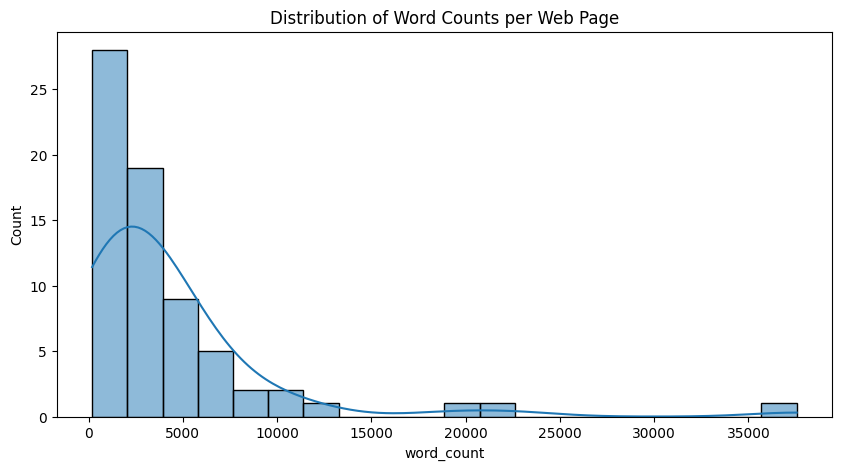

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title("Distribution of Word Counts per Web Page")
plt.show()


# Outliers checking

In [29]:
empty_pages = df[df['word_count'] < 30]
print("Pages with very little content:", len(empty_pages))
display(empty_pages[['url', 'word_count']].head())


Pages with very little content: 0


Empty DataFrame
Columns: [url, word_count]
Index: []

In [31]:
import pandas as pd

df = pd.read_csv("extracted_content.csv")

# Basic info
df.info()

# Descriptive statistics
df.describe(include='all')

# Number of duplicates
print("Duplicate URLs:", df['url'].duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           81 non-null     object
 1   cleaned_text  69 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
Duplicate URLs: 0


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'].astype(str))
top_keywords = tfidf.get_feature_names_out()

print("Top 20 Keywords by TF-IDF:")
print(top_keywords)


Top 20 Keywords by TF-IDF:
['10' '2025' 'access' 'ai' 'content' 'data' 'digital' 'free' 'learning'
 'machine' 'marketing' 'media' 'network' 'new' 'retrieved' 'search'
 'security' 'social' 'time' 'use']


# Sentiment Analysis

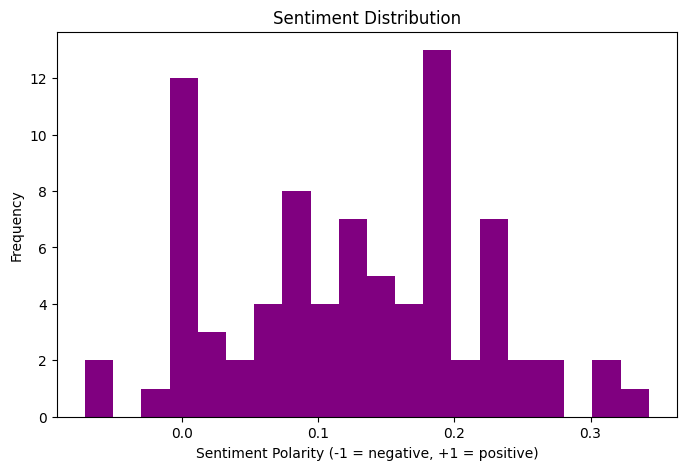

url  sentiment
63                      https://www.pricegrabber.com/   0.342782
46  https://www.youtube.com/creators/how-things-wo...   0.310238
61                          https://viewyourdeal.com/   0.305754
60                          https://www.dealnews.com/   0.267163
30               https://comfax.com/reviews/free-fax/   0.265416

In [35]:
from textblob import TextBlob

df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8,5))
plt.hist(df['sentiment'], bins=20, color='purple')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity (-1 = negative, +1 = positive)")
plt.ylabel("Frequency")
plt.show()

df[['url', 'sentiment']].sort_values(by='sentiment', ascending=False).head(5)

# Keyword Density

In [36]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def keyword_density(text):
    words = [w.lower() for w in str(text).split() if w.isalpha() and w.lower() not in stop_words]
    return Counter(words).most_common(10)

# Example for one article
keyword_density(df.iloc[0]['cleaned_text'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('cyber', 60),
 ('cybersecurity', 27),
 ('security', 21),
 ('september', 20),
 ('october', 19),
 ('incident', 16),
 ('tabletop', 15),
 ('august', 15),
 ('attacks', 13),
 ('response', 12)]

# Top Keywords

In [37]:
all_words = ' '.join(df['cleaned_text'].astype(str)).split()
filtered = [w.lower() for w in all_words if w.isalpha() and w.lower() not in stop_words]
top_keywords = Counter(filtered).most_common(20)
print("Top 20 frequent words across dataset:")
print(top_keywords)


Top 20 frequent words across dataset:
[('marketing', 1357), ('content', 1298), ('data', 1086), ('security', 1001), ('learning', 917), ('ai', 915), ('social', 725), ('network', 686), ('search', 669), ('digital', 633), ('machine', 616), ('retrieved', 566), ('free', 535), ('media', 527), ('use', 507), ('new', 498), ('may', 493), ('access', 477), ('original', 464), ('learn', 449)]


# Domain-Level Insights

<Axes: title={'center': 'Average Word Count per Domain'}, xlabel='domain'>

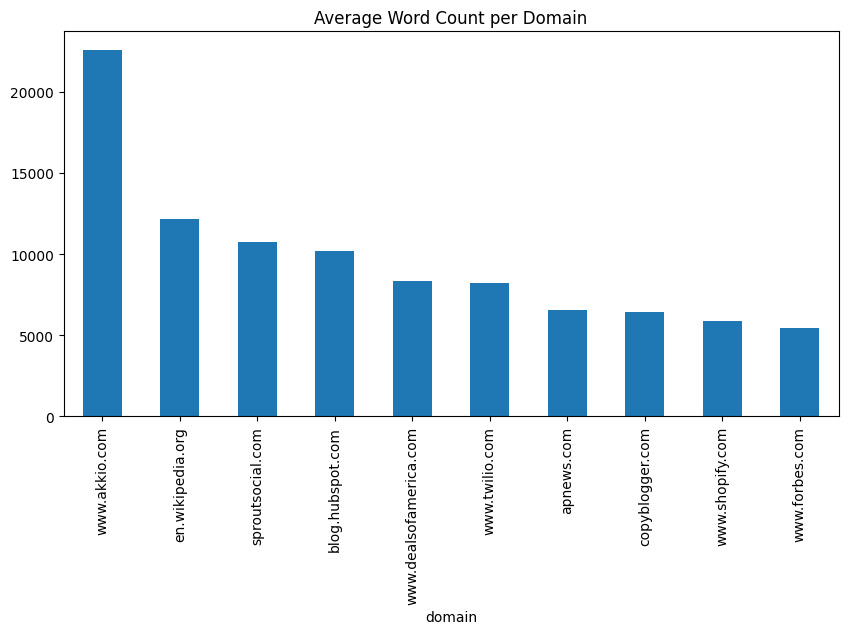

In [38]:
df['domain'] = df['url'].apply(lambda x: x.split('/')[2])

domain_stats = df.groupby('domain')['word_count'].mean().sort_values(ascending=False)
domain_stats.head(10).plot(kind='bar', figsize=(10,5), title="Average Word Count per Domain")


# Correlation Between Features

In [39]:
df[['word_count', 'char_count', 'sentiment']].corr()


word_count  char_count  sentiment
word_count    1.000000    0.998670   0.059351
char_count    0.998670    1.000000   0.052894
sentiment     0.059351    0.052894   1.000000

In [40]:
df.to_csv("features.csv", index=False)


 # Feature Extraction
 

In [43]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from textstat import flesch_reading_ease, smog_index, automated_readability_index
from tqdm import tqdm
tqdm.pandas()



In [44]:
df = pd.read_csv("extracted_content.csv")

In [45]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()


In [46]:
df["cleaned_text"] = df["cleaned_text"].astype(str).progress_apply(clean_text)

100%|██████████| 81/81 [00:00<00:00, 1376.56it/s]


#  Basic text features

In [47]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
df["char_count"] = df["cleaned_text"].apply(len)
df["avg_word_length"] = df["char_count"] / df["word_count"].replace(0, np.nan)
df["unique_word_ratio"] = df["cleaned_text"].apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))


# Sentiment features

In [48]:
df["sentiment_polarity"] = df["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_subjectivity"] = df["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)


# Readability features

In [49]:
df["flesch_reading_ease"] = df["cleaned_text"].apply(lambda x: flesch_reading_ease(x) if len(x.split()) > 50 else np.nan)
df["smog_index"] = df["cleaned_text"].apply(lambda x: smog_index(x) if len(x.split()) > 50 else np.nan)
df["automated_readability_index"] = df["cleaned_text"].apply(lambda x: automated_readability_index(x) if len(x.split()) > 50 else np.nan)


# Keyword density for SEO keywords

In [50]:
keywords = ["security", "ai", "cloud", "data", "analysis", "software"]
for kw in keywords:
    df[f"keyword_density_{kw}"] = df["cleaned_text"].apply(
        lambda x: x.split().count(kw) / (len(x.split()) + 1)
    )

# TF-IDF features

In [51]:
tfidf = TfidfVectorizer(max_features=30, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df["cleaned_text"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{w}" for w in tfidf.get_feature_names_out()])
df = pd.concat([df, tfidf_df], axis=1)

In [52]:
df.to_csv("features.csv", index=False)

print("features.csv saved successfully!")
print(f"Total features: {df.shape[1]}")

features.csv saved successfully!
Total features: 47



Performing EDA...

--- Summary Statistics ---
         word_count     char_count  avg_word_length  sentiment_polarity  \
count     81.000000      81.000000        81.000000           81.000000   
mean    3217.765432   21277.197531         6.161954            0.123651   
std     4673.897528   31132.112658         1.395899            0.091052   
min        1.000000       3.000000         3.000000           -0.071473   
25%      494.000000    3010.000000         6.074412            0.055262   
50%     1895.000000   12159.000000         6.536123            0.126337   
75%     4123.000000   26612.000000         7.013871            0.189499   
max    29296.000000  203985.000000         7.720024            0.324775   

       flesch_reading_ease  
count            69.000000  
mean          -3780.124378  
std            4925.754105  
min          -29689.037742  
25%           -4473.870575  
50%           -2438.965636  
75%           -1048.844033  
max            -137.692692  

EDA complete. P

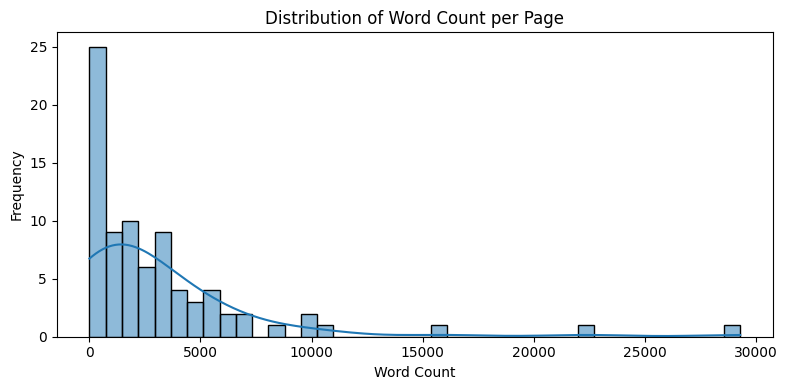

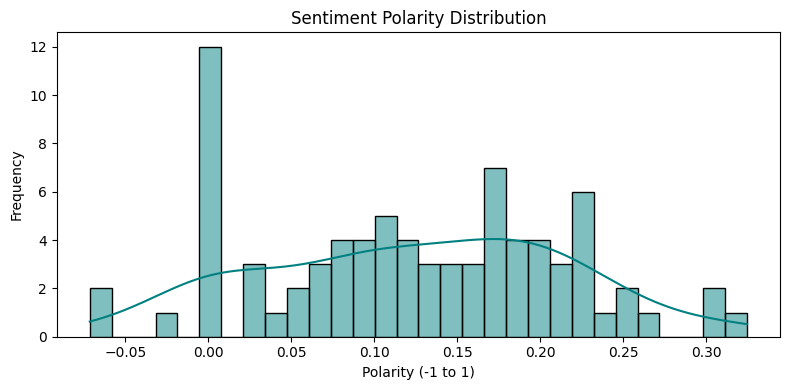

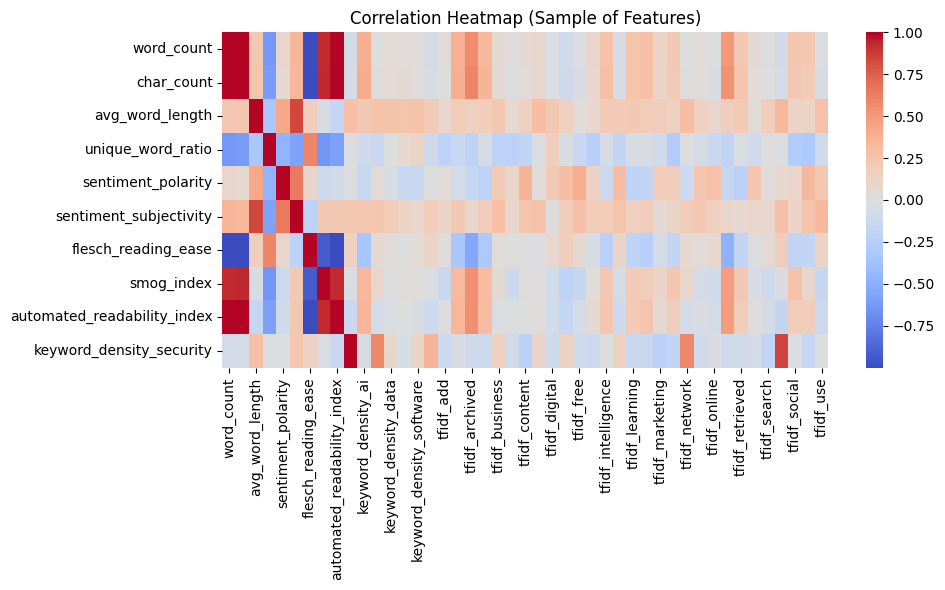

In [54]:

print("\nPerforming EDA...")

# Summary statistics
summary_stats = df[["word_count", "char_count", "avg_word_length", "sentiment_polarity", "flesch_reading_ease"]].describe()
print("\n--- Summary Statistics ---")
print(summary_stats)

# Plot 1: Distribution of Word Count
plt.figure(figsize=(8,4))
sns.histplot(df["word_count"], bins=40, kde=True)
plt.title("Distribution of Word Count per Page")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("eda_word_count_distribution.png")

# Plot 2: Sentiment Polarity Distribution
plt.figure(figsize=(8,4))
sns.histplot(df["sentiment_polarity"], bins=30, kde=True, color='teal')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (-1 to 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("eda_sentiment_distribution.png")

# Plot 3: Correlation Heatmap (Top 10 Numeric Features)
plt.figure(figsize=(10,6))
numeric_features = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(numeric_features.head(10), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Sample of Features)")
plt.tight_layout()
plt.savefig("eda_correlation_heatmap.png")

print("\nEDA complete. Plots saved as:")
print(" - eda_word_count_distribution.png")
print(" - eda_sentiment_distribution.png")
print(" - eda_correlation_heatmap.png")

print("\nFeature extraction and analysis completed successfully.")

# duplicate detection

In [55]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [57]:
df = pd.read_csv("features.csv")

In [58]:
if 'cleaned_text' not in df.columns:
    raise KeyError("Expected 'cleaned_text' column in features.csv")

print(f"Loaded {len(df)} records for duplicate detection.\n")

Loaded 81 records for duplicate detection.



# TF-IDF Vectorization

In [59]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"].astype(str))

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (81, 5000)


# Pairwise Cosine Similarity

In [60]:
similarity_matrix = cosine_similarity(tfidf_matrix)

# Similarity Analysis

In [61]:
triu_indices = np.triu_indices_from(similarity_matrix, k=1)
sim_scores = similarity_matrix[triu_indices]

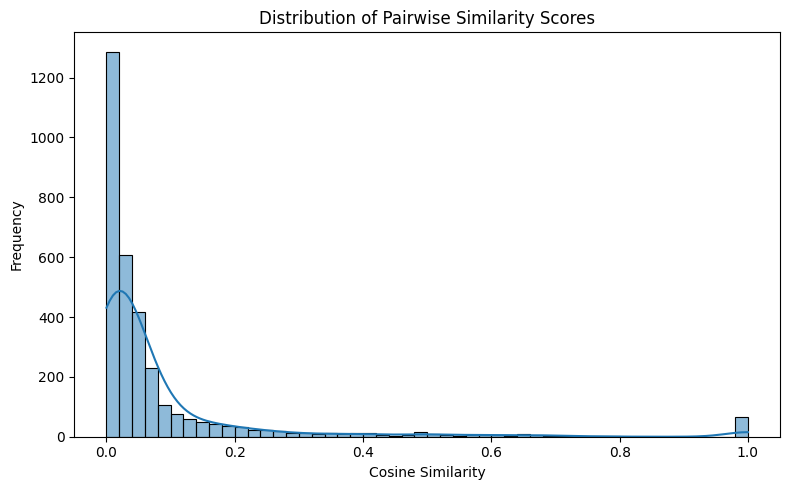

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(sim_scores, bins=50, kde=True)
plt.title("Distribution of Pairwise Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("similarity_distribution.png")
plt.show()
plt.close()


In [ ]:
# Choose threshold for near-duplicates
# (Common SEO threshold range: 0.75 – 0.95)

In [65]:
threshold = 0.85
duplicates = []

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        sim = similarity_matrix[i, j]
        if sim >= threshold:
            duplicates.append((df.loc[i, "url"], df.loc[j, "url"], sim))